# This Program classifies a person as having a cardiovascular disease or not

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns


In [2]:
df = pd.read_csv("cardio.csv",sep=";")
df.iloc[1:100]
# age is in days


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,129,21076,1,158,53.0,110,70,1,1,0,0,1,0
96,131,19258,2,165,65.0,110,70,1,1,0,0,1,0
97,132,18410,1,165,99.0,150,110,1,1,0,0,0,1
98,133,21860,2,170,100.0,120,80,1,1,0,0,0,1


In [3]:
df.shape

(70000, 13)

In [4]:
# Count the null values in each column
df.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [5]:
# Another way to check for null or missing values
df.isnull().values.any()

False

In [6]:
# View Some of the Statistics
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
# Get a count of the number of patients with a cardiovascular disease or without
df['cardio'].value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

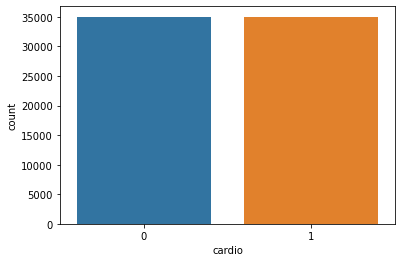

In [8]:
# Visualize the count
sns.countplot(df['cardio'])

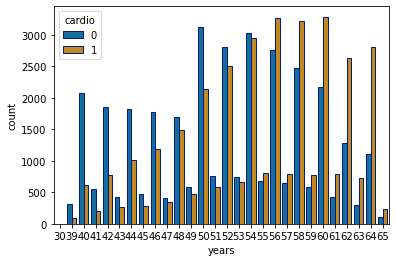

In [9]:
# Look at the number of people with a cardiovascular disease that exceed the number of people without a cardiovascular disease

# Create a years column

df['years'] = (df['age']/365).round(0)
df['years'] = pd.to_numeric( df['years'] , downcast="integer")

# Visualize the data

sns.countplot(x="years",hue="cardio",data=df,palette="colorblind",edgecolor=sns.color_palette("dark",n_colors=1))

In [10]:
# Get the correlation of the columns
df.corr()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years
id,1.000000,0.003457,0.003502,-0.003038,-0.001830,0.003356,-0.002529,0.006106,0.002467,-0.003699,0.001210,0.003755,0.003799,0.003050
age,0.003457,1.000000,-0.022811,-0.081515,0.053684,0.020764,0.017647,0.154424,0.098703,-0.047633,-0.029723,-0.009927,0.238159,0.999090
gender,0.003502,-0.022811,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109,-0.023017
height,-0.003038,-0.081515,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821,-0.081456
weight,-0.001830,0.053684,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660,0.053661
ap_hi,0.003356,0.020764,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475,0.020793
ap_lo,-0.002529,0.017647,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719,0.017754
cholesterol,0.006106,0.154424,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147,0.154386
gluc,0.002467,0.098703,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307,0.098596
smoke,-0.003699,-0.047633,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486,-0.047884


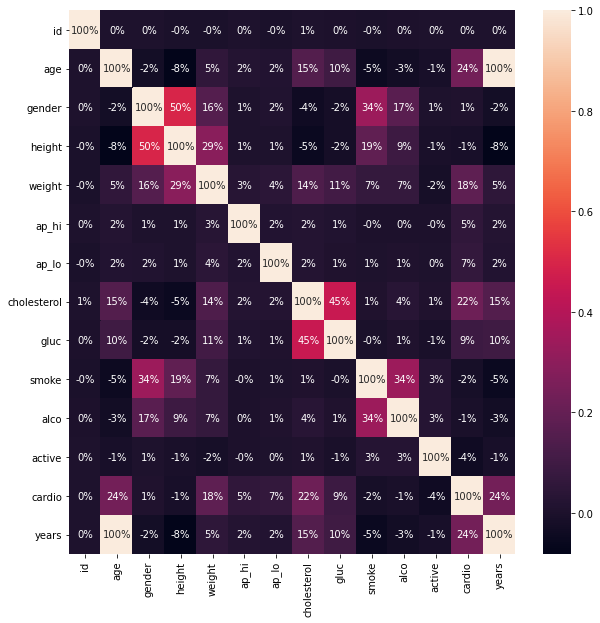

In [11]:
# Visualize the data

import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))  # in inches
sns.heatmap(df.corr(),annot=True,fmt=".0%")

In [12]:
# remove or drop the years column
df =df.drop("years",axis=1)
df =df.drop("id",axis=1)

In [13]:
df.head(11)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,19834,1,164,68.0,110,60,1,1,0,0,0,0


In [28]:
# Split the dat into feature data and target data
X = df.iloc[:,:-1].values
Y = df.iloc[:,-1].values

In [29]:
# Split the dataset into 75% training dataset and 25% testing dataset

from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=1)

In [30]:
# # Feature Scaling 
# # Scaling the values to be between 0 and 1 inclusive

# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

In [31]:
# Create a function for the models


def models(X_train,Y_train):
    
    # Logistic Regression
    
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state=0)
    log.fit(X_train,Y_train)
    
    
    # Decision Tree Classifier
    
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion = "entropy" , random_state=0)
    tree.fit(X_train,Y_train)
    
    # Random Forest Classifier
    
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators = 10 , criterion = "entropy",random_state=0)
    forest.fit(X_train,Y_train)
    
    # Print the models accuracy on the training data
    
    print('[0] Logistic Regression Training Accuracy : ',log.score(X_train,Y_train))
    print('[1] Decision Tree Classifier Training Accuracy : ',tree.score(X_train,Y_train))
    print('[2] Random Forest Classifier Training Accuracy : ',forest.score(X_train,Y_train))
    
    return log,tree,forest
    
    

In [32]:
# Test the model Accuracy on the trainig data set

model = models(X_train,Y_train)

[0] Logistic Regression Training Accuracy :  0.6965333333333333
[1] Decision Tree Classifier Training Accuracy :  0.9998095238095238
[2] Random Forest Classifier Training Accuracy :  0.979447619047619


In [33]:
# Test the model Accuracy on the test data set

from sklearn.metrics import confusion_matrix
for i in range(len(model)):
    
    print("Model : ",i)
    print()
    cm = confusion_matrix(Y_test,model[i].predict(X_test))

    TN = cm[0][0]
    TP = cm[1][1]
    FN = cm[1][0]
    FP = cm[0][1]

    # Print the confusion matrix 
    print(cm)

    # Printing the accuracy
    print("Model ",i,"test Accuracy = {}".format((TP+TN)/(TP+TN+FN+FP)))
    print()

Model :  0

[[6370 2239]
 [3053 5838]]
Model  0 test Accuracy = 0.6976

Model :  1

[[5470 3139]
 [3238 5653]]
Model  1 test Accuracy = 0.6356

Model :  2

[[6471 2138]
 [3150 5741]]
Model  2 test Accuracy = 0.6978285714285715



In [34]:
# Testing Accuracy
with open("HeartDisease","rb") as f:
    randomForest = pickle.load(f)

pred = randomForest.predict(X_test)
print(pred[1:100])
print()
print(Y_test[1:100])
model_inputs1 = [19834,1,164,68.0,110,60,1,1,0,0,0]
randomForest.predict([model_inputs1])

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

[1 1 1 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 1 0 0 1 1 0 1 1
 0 0 0 0 0 1 1 0 0 1 1 1 1 1 0 1 1 0 0 0 1 0 0 1 1 1 0 0 0 1 0 0 1 1 0 1 1
 0 0 1 1 0 0 0 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 1 0 1]


array([1], dtype=int64)

In [45]:
# Saving Model

import pickle

with open("HeartDisease","wb") as f:
    pickle.dump(model[0],f)

In [44]:
with open("HeartDisease","rb") as f:
    randomForest = pickle.load(f)

model_inputs = [17623,2,169,82.0,150,100,1,1,0,0,1]
model_inputs1 = [22530,1,169,80.0,120,80,1,1,0,0,1]
model_inputs2 = [17668,1,158,71.0,110,70,1,1,0,0,1]
randomForest.predict([model_inputs1])

array([0], dtype=int64)

In [39]:
# # Feature Scaling 
# # Scaling the values to be between 0 and 1 inclusive

# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# model_inputs2 = sc.fit_transform([model_inputs2])
# randomForest.predict(model_inputs)